Transformers have revolutionized the world of Natural Language Processing (NLP) with their immense capacity to understand and generate human-like text. Central to this capability are embeddings, which efficiently convert text data into numerical representations. In this comprehensive guide, we'll dive deep into the world of embeddings in transformers, employing PyTorch and the HuggingFace library.

##1. Introduction
In NLP, embeddings transition text into a numerical realm, retaining semantics. This numerical representation is essential for feeding text into neural networks. Transformers employ multiple embeddings, including token, positional, and segment embeddings. Their combined might empowers transformers to understand text nuances and order.

##2. Prerequisites: Setting Up the Environment
Before diving deep, ensure you've set up your environment:

In [1]:
!pip install -q torch
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.6 MB/s eta 0:00:00


##3. Understanding Embeddings
Embeddings transform categorical variables into continuous vector space. In the context of NLP, words or phrases are mapped to vectors of real numbers. The goal is to have semantically similar items represented by vectors that are close in this space.

##4. Deep Dive into Token Embeddings
Token embeddings convert individual words or sub-words into a dense vector format.

In [2]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

input_text = "The world of embeddings is vast."
tokens = tokenizer(input_text, return_tensors='pt')


This code uses BERT, a popular transformer model, to generate token embeddings.

##5. Unraveling Positional Embeddings
To grasp sequences or order of words, transformers use positional embeddings. They encode the position of a token in the sequence, compensating for the transformer's architecture which doesn't inherently understand order.

##6. Visualizing Embeddings for Clarity
Visual aids can demystify embeddings:

**Token Embeddings:**
Use Principal Component Analysis (PCA) to reduce the dimensionality and visualize:

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

word_embeddings = model(**tokens).last_hidden_state[0].detach().numpy()
pca_result = PCA(n_components=2).fit_transform(word_embeddings)


Plotting this gives a bird's-eye view of how tokens are related.

###Positional Embeddings:
Extract from the model and visualize:

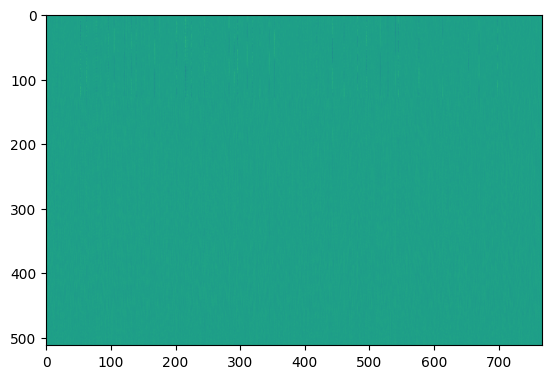

In [4]:
pos_emb = model.embeddings.position_embeddings.weight.detach().numpy()
plt.imshow(pos_emb)


## 7. The Mathematics Behind Embeddings

Embeddings utilize high-dimensional spaces to capture semantic relationships. Essentially, embeddings are the result of optimization problems where each word's representation gets refined over time during model training.

### 7.1 Vector Representation

For a vocabulary \( V \) of size \( N \), each word can be represented as a one-hot vector of size \( N \). If "apple" is the \( i^{th} \) word in \( V \), its one-hot vector \( o \) has a 1 at the \( i^{th} \) position and 0 elsewhere.

$$ o_{apple} = [0, 0, ..., 1, ..., 0, 0] $$

### 7.2 Embedding Matrix

The embedding matrix \( E \) of size \( N \times d \) (where \( d \) is the desired embedding dimension) is multiplied by the one-hot vector to produce the dense embedding vector \( v \) for the word.

$$v_{apple} = E \times o_{apple}$$

### 7.3 Objective Function in Word2Vec

For simplicity, let's consider the Skip-Gram model. Given a center word \( c \) and a context word \( o \) from its surrounding, the objective is to maximize the following probability:

$$ P(o|c) = \frac{exp(u_o^T v_c)}{\sum_{w=1}^{N} exp(u_w^T v_c)} $$

Where:
- $ v_c $ is the embedding of the center word.
- \( u_o \) and \( u_w \) are the output vector representations of the context word and any word in the vocabulary, respectively.

The goal is to adjust the embeddings to maximize the likelihood of the context word given the center word.

### 7.4 Training via Gradient Descent

The embeddings are learned by minimizing the negative log likelihood of the objective function:

$$ J = -\log P(o|c) $$

This is achieved using gradient descent. The gradient with respect to the embedding vectors and the output vectors is computed and used to update the vectors iteratively.

### 7.5 Positional Encoding in Transformers

In transformers, positional information is encoded using sinusoidal functions:

$$ PE(pos, 2i) = \sin\left(\frac{pos}{10000^{2i/d}}\right) $$
$$ PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{2i/d}}\right) $$

Where:
- \( pos \) is the position of the word in the sequence.
- \( i \) is the dimension.

The sinusoidal pattern allows the model to attend to relative positions, and since the pattern is deterministic, it doesn't need to be learned.



## Segment Embeddings: Beyond Tokens and Position

When building natural language processing models, especially those tailored for tasks like question answering, entailment, or sentence-pair classification, it often becomes necessary to feed more than one sequence into a model. In such cases, the model needs to be aware of which tokens belong to which sequence. This is where segment embeddings come into play.

### Definition

Segment embeddings, often called sentence embeddings or token type embeddings, are vectors used to distinguish different sequences when they are fed into a transformer model together.

### How Do They Work?

Let's take the BERT (Bidirectional Encoder Representations from Transformers) model as an example. BERT is pre-trained on concatenated pairs of sentences. When two sentences are fed into BERT, the first word of each sentence gets a special token, \([CLS]\) and \([SEP]\), respectively. Apart from the token and positional embeddings, BERT uses segment embeddings to differentiate between the two sentences. The tokens from the first sentence get a \textit{segment A} embedding, while the tokens from the second sentence get a \textit{segment B} embedding.

### Mathematical Formulation

Given:
1. **Token Embeddings** (\( E_t \)): This represents the embedding for each token.
2. **Positional Embeddings** (\( E_p \)): This provides information about the position of the token in the sequence.
3. **Segment Embeddings** (\( E_s \)): There are usually only two of these (for \( A \) and \( B \)). Each token in a sequence gets the embedding of its corresponding segment.

The final embedding for a token is the sum of these three embeddings:

\[ E_{final} = E_t + E_p + E_s \]

This combined embedding is then used as input to the Transformer.

### Why Are Segment Embeddings Important?

1. **Sequence Differentiation**: As stated earlier, in tasks where two sequences are fed together, segment embeddings help in distinguishing tokens from different sequences.

2. **Model Generalization**: They allow models like BERT to be fine-tuned on downstream tasks that require understanding of two distinct sequences, like question answering where a model needs to differentiate between a question and a passage.

3. **Semantic Understanding**: By differentiating sequences, the model can better capture semantic relationships between them. For instance, in sentence-pair classification tasks like entailment, understanding the relationship between two sentences is crucial, and segment embeddings aid in this.

### Limitations

Segment embeddings in models like BERT are binary; they can differentiate between two sequences (\( A \) and \( B \)). If there's a need to process more than two sequences simultaneously, this binary embedding approach won't suffice. However, one could theoretically expand this concept to handle more sequences, but that would also require changing the pre-training process to accommodate these additional segments.

##9. Custom Embeddings: Tailoring to Your Needs
For domain-specific applications, training custom embeddings on specialized datasets can provide more relevance.

##10. Challenges and Limitations
Embeddings, though powerful, aren't free from challenges. They might fail to capture polysemous words effectively, and cultural biases present in data can be perpetuated in embeddings.

##11. Future Developments in Embedding Space
Research in embedding space is burgeoning. Future directions include dynamic embeddings that change based on context, and zero-shot embeddings that can represent words not seen during training.

##12. Conclusion
Embeddings are the linchpin of transformer architectures, bridging human language and machine understanding. As we harness their potential and address their limitations, the future of NLP shines even brighter.